In [1]:
#import dependencies

%matplotlib notebook
import os
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float
import pandas as pd


In [4]:
# build engine string by calling passwords from environ

postgres_user = os.environ.get("POSTGRES_USER")
postgres_pass = os.environ.get("POSTGRES_PASS")
postgres_db = "Employees_DB"
engine_string= "postgresql://{}:{}@localhost/{}".format(postgres_user, postgres_pass, postgres_db)


In [5]:
# create & connect engine, set base, and bind

engine = create_engine(engine_string)
connection = engine.connect()
Base = declarative_base()
Base.metadata.create_all(engine)
session = Session(bind=engine)


In [6]:
# create class for salaries table

class Salaries(Base):
    __tablename__ = 'salaries'
    employee_no= Column(Integer, primary_key=True)
    salary = Column(Integer)


In [7]:
# create class for titles table

class Titles(Base):
    __tablename__ = 'titles'
    employee_no= Column(Integer, primary_key=True)
    title= Column(String)
    

In [8]:
# join salaries and title tables and run agg function to get avg salary group by title

salaries_by_title = engine.execute("SELECT titles.title, ROUND(AVG(salaries.salary),0)\
FROM titles JOIN salaries\
    ON titles.employee_no = salaries.employee_no GROUP BY title").fetchall()

print(salaries_by_title)


[('Assistant Engineer', Decimal('48493')), ('Engineer', Decimal('48540')), ('Manager', Decimal('51531')), ('Senior Engineer', Decimal('48507')), ('Senior Staff', Decimal('58503')), ('Staff', Decimal('58465')), ('Technique Leader', Decimal('48581'))]


In [9]:
# convert this data into a dataframe

salaries_df = pd.DataFrame(salaries_by_title, columns=['Title', 'Avg Salary'])
salaries_df


,Title,Avg Salary
0,Assistant Engineer,48493
1,Engineer,48540
2,Manager,51531
3,Senior Engineer,48507
4,Senior Staff,58503
5,Staff,58465
6,Technique Leader,48581


In [10]:
# set title as index

new_salaries_df = salaries_df.set_index('Title')
new_salaries_df


,Avg Salary
Title,
Assistant Engineer,48493
Engineer,48540
Manager,51531
Senior Engineer,48507
Senior Staff,58503
Staff,58465
Technique Leader,48581


In [11]:
# check data types

new_salaries_df.dtypes


Avg Salary    object
dtype: object

In [12]:
# update salary to a numeric type and confirm 

new_salaries_df = new_salaries_df.astype({'Avg Salary': float})
new_salaries_df.dtypes


Avg Salary    float64
dtype: object

<IPython.core.display.Javascript object>


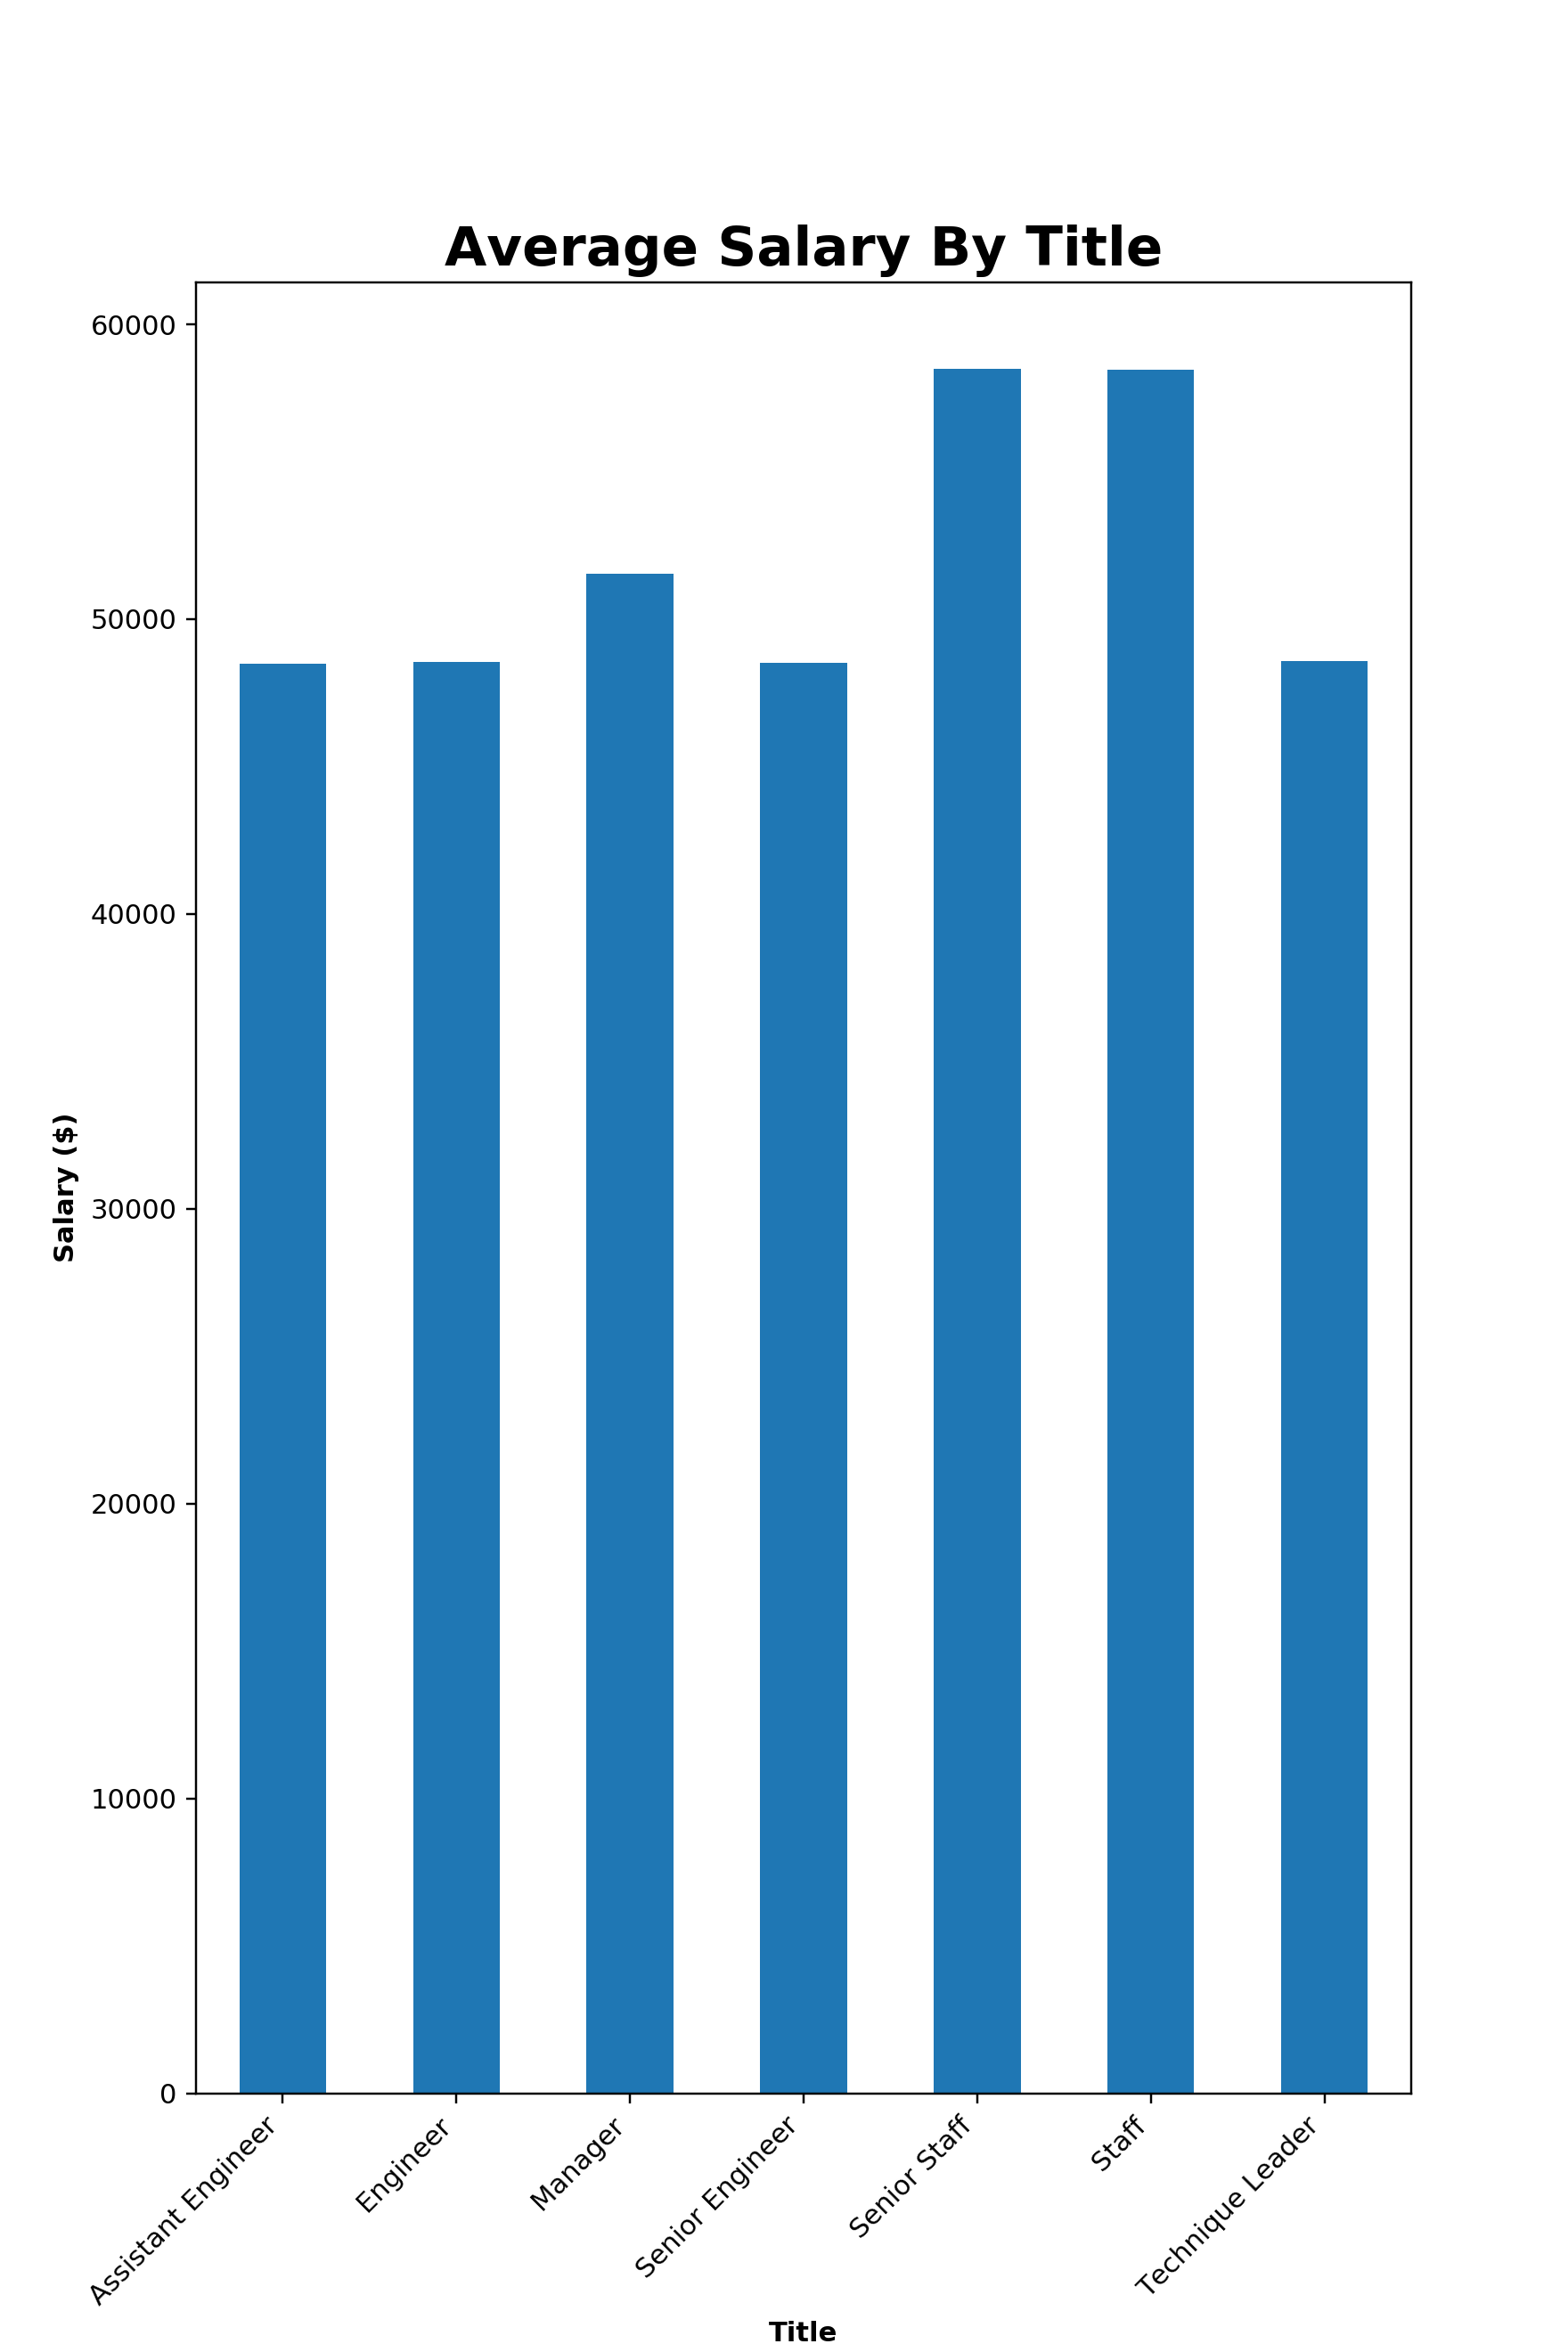

In [13]:
# plot dataframe

ax = new_salaries_df.plot.bar(rot=0, figsize=(8,12))
ax.set_title('Average Salary By Title', fontsize=20, fontweight="bold")
ax.set_xlabel('Title', fontweight="bold")
ax.set_ylabel('Salary ($)', fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
ax.get_legend().remove()
plt.savefig('Avg_Salaries.png')

